## Game of Life

# Ideas:

* Make each pixel an object and follow its state (make sure to return state)
    * Save state, and new_state as properties of the Cell
* GoL in 3D space

# Rules:

1. A living cell will survive into the next generation by default, unless:
    - It has fewer than 2 live neighbours (underpopulation)
    - It has more than three live neighbours (overpopulation)
2. A dead cell will spring to life if has exactly three live neighbours (reproduction)

In [1]:
UNDERPOPULATION = 2
OVERPOPULATION = 3
REPRODUCTION = 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [11]:
universe = np.zeros((6,6))

In [12]:
beacon = [[1, 1, 0, 0],
          [1, 1, 0, 0],
          [0, 0, 1, 1],
          [0, 0, 1, 1]]

universe [1:5, 1:5] = beacon

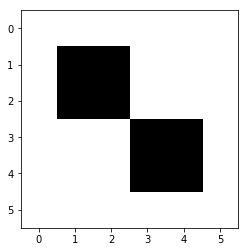

In [5]:
plt.imshow(universe, cmap='binary')

In [24]:
def survival(x, y, universe):
    """
    :param x: <int> x coordinate of the Cell
    :param y: <int> y coordinate of the Cell
    """
    # Find the number of living neighbours by taking the sum of the 8 surrounding grid squares
    num_neighbours = np.sum(universe[x-1:x+2, y-1:y+2]) - universe[x, y]
    
    # The rules of Life
    if universe[x, y] and not UNDERPOPULATION <= num_neighbours <= OVERPOPULATION:
        return 0
    elif num_neighbours == REPRODUCTION:
        return 1
    
    return universe[x, y]

In [19]:
def generation(universe):
    
    new_universe = np.copy(universe)
    
    # Simple loop over every possible xy coordinate.
    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            new_universe[i, j] = survival(i, j, universe)
            
    return new_universe

In [15]:
seeds = {'diehard': [[0, 0, 0, 0, 0, 0, 1, 0],
                     [1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 0, 1, 1, 1]],
         'boat': [[1, 1, 0],
                  [1, 0, 1],
                  [0, 1, 0]],
         'r_pentomino': [[0, 1, 1],
                         [1, 1, 0],
                         [0, 1, 0]],
         'pentadecathlon': [[1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 0, 1, 1, 1, 1, 0, 1],
                            [1, 1, 1, 1, 1, 1, 1, 1]],
         'beacon': [[1, 1, 0, 0],
                    [1, 1, 0, 0],
                    [0, 0, 1, 1],
                    [0, 0, 1, 1]],
         'acorn': [[0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0],
                   [1, 1, 0, 0, 1, 1, 1]],
         'spaceship': [[0, 0, 1, 1, 0],
                       [1, 1, 0, 1, 1],
                       [1, 1, 1, 1, 0],
                       [0, 1, 1, 0, 0]],
         'block_switch_engine': [[0, 0, 0, 0, 0, 0, 1, 0],
                                 [0, 0, 0, 0, 1, 0, 1, 1],
                                 [0, 0, 0, 0, 1, 0, 1, 0],
                                 [0, 0, 0, 0, 1, 0, 0, 0],
                                 [0, 0, 1, 0, 0, 0, 0, 0],
                                 [1, 0, 1, 0, 0, 0, 0, 0]],
         'infinite': [[1, 1, 1, 0, 1],
                      [1, 0, 0, 0, 0],
                      [0, 0, 0, 1, 1],
                      [0, 1, 1, 0, 1],
                      [1, 0, 1, 0, 1]]}

In [28]:
def animate_life(universe_size, seed, seed_position, n_generations=30, interval=300, save=False):
    # Initialise the universe and seed
    universe = np.zeros(universe_size)
    x_start, y_start = seed_position[0], seed_position[1]
    seed_array = np.array(seeds[seed])
    universe[x_start:x_start+seed_array.shape[0],
             y_start:y_start+seed_array.shape[1]] = seed_array
    
    # Animate
    fig = plt.figure()
    plt.axis('off')
    ims = []
    
    for i in range(n_generations):
        ims.append((plt.imshow(universe, cmap='Blues'),))
        universe = generation(universe)
        
    im_ani = animation.ArtistAnimation(fig, ims, interval=interval, repeat_delay=3000,
                                       blit=True)
    
    # Optional: save the animation, with a name based on the seed.
    if save:
        im_ani.save((str(seed) + '.mp4'), writer=animation.FFMpegWriter(), dpi=300)
        

# Example usage
"""
animate_life(universe_size=(100, 100), seed='infinite', seed_position=(40,40),
             n_generations=500, interval=50, save=True)
"""

"\nanimate_life(universe_size=(100, 100), seed='infinite', seed_position=(40,40),\n             n_generations=500, interval=50, save=True)\n"

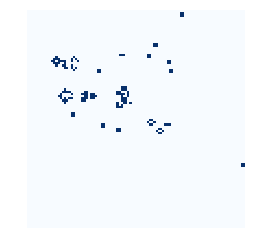

In [29]:
animate_life(universe_size=(100, 100), seed='infinite', seed_position=(40,40),
             n_generations=500, interval=5, save=True)

In [174]:
class Cell:
    def __init__(self, x, y, state):
        self.x = x
        self.y = y
        self.state = state
        self.new_state = state

    def survival(self, universe, cols, rows):
        self.num_neighbours = 0
        for i in (range(self.x-1,self.x+2)):
            for j in (range(self.y-1,self.y+2)):
                col = (self.x + i + cols) % cols
                row = (self.y + j + rows) % rows
                self.num_neighbours += universe[col, row]
        self.num_neighbours -= universe[self.x, self.y]
        print(self.num_neighbours)
                
        # The rules of Life
        if universe[self.x, self.y] and not UNDERPOPULATION <= self.num_neighbours <= 3:
            self.new_state = 0
        elif self.num_neighbours == REPRODUCTION:
            self.new_state = 1
            
    def update_state(self):
        self.state = self.new_state

In [50]:
def generation(universe):
    new_universe = np.copy(universe)
    
    # Apply the survival method to every Cell in the universe
    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            j.survival(universe)
    
     for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            j.survival(universe)   

In [143]:
cell1.x, cell1.y

(5, 0)

In [55]:
cell1.sum_test(2, 3)

(6, 23)

In [169]:
cell1 = Cell(5, 0, 1)

In [170]:
cell1.state

1

In [171]:
cell1.state

1

In [173]:
cell1.survival(universe, 1, 2)

-1.0


In [167]:
cell1.new_state


0

In [90]:
cell1.num_neighbours

AttributeError: 'Cell' object has no attribute 'num_neighbours'

In [139]:
universe[cell1.x, cell1.y] and not UNDERPOPULATION <= cell1.num_neighbours <= 3

True

In [138]:
universe[cell1.x, cell1.y]

1.0

In [161]:
universe

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])